In [1]:
# Pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#linear_model
from sklearn import linear_model

# train test split
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("TeamsHalf.csv")
data.head()

,year,lgID,tmID,half,rank,G,W,L,T,GF,GA
0,1916,NHA,MOC,1,1,10,7,3,0,58,38
1,1916,NHA,MOC,2,3,10,3,7,0,31,42
2,1916,NHA,MOW,1,5,10,3,7,0,56,72
3,1916,NHA,MOW,2,4,10,2,8,0,38,65
4,1916,NHA,OT1,1,2,10,7,3,0,56,41


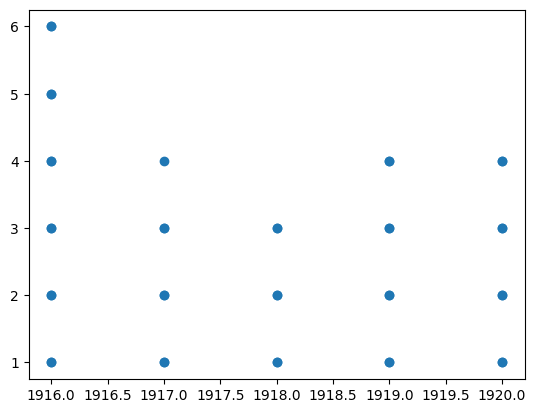

In [3]:
plt.scatter(data['year'],data['rank'])
plt.show()

In [4]:
# Dropping Null values
data.dropna(inplace=True)

In [5]:
sliced_x = data.iloc[:,0:3].join(data.iloc[:,4:8])
sliced_x.head()

,year,lgID,tmID,rank,G,W,L
0,1916,NHA,MOC,1,10,7,3
1,1916,NHA,MOC,3,10,3,7
2,1916,NHA,MOW,5,10,3,7
3,1916,NHA,MOW,4,10,2,8
4,1916,NHA,OT1,2,10,7,3


In [6]:
from sklearn.preprocessing import LabelEncoder
toBeEncode =['year','lgID' ,'tmID', 'rank','G' ,'W','L']
encoder = LabelEncoder()
for col in toBeEncode:
    sliced_x[col]= encoder.fit_transform(sliced_x[col])

In [7]:
sliced_y = data.iloc[:,3].values
sliced_y

array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2],
      dtype=int64)

In [8]:
train_x, test_x , train_y, test_y = train_test_split(sliced_x.values,sliced_y,test_size=0.3)

In [9]:
regression = linear_model.LinearRegression()
regression.fit(train_x,train_y)

LinearRegression()

In [10]:
# Prediction
result = regression.predict(test_x)
print(f"Result: {result}")

Result: [1.56068121 1.78965471 1.06694283 1.70937484 1.1271752  1.70477349
 1.61599206 1.64593158 1.81614903 1.39870335 1.65852644 1.21563646
 1.4542018 ]
